## Importing Necessary Libraries...

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creating a Random Dataframe of Three Variables...

In [27]:
x1 = 0.6 * np.random.rand(100)
x2 = 1.5*x1 + (np.random.rand(100)/3)
x3 = (2.3*x1 + (np.random.rand(100)/5) + 0.05*x2)
x4 = 4.5*x3 + np.random.rand(100)
x5 = x4 + (np.random.rand(100)/4)
x6 = 4*x3 + 0.4*x5 + np.random.rand(100)
x7 = 4 * np.random.rand(100)
x8 = 0.4 * np.random.rand(100)
x9 = 33 * np.random.rand(100)
x10 = 4.5 * np.random.rand(100)

training_data = pd.DataFrame(data={"X1": x1, "X2": x2 , "X3" : x3 , "X4" : x4 , "X5" : x5,"X6" : x6,"X7" : x7,"X8" : x8,"X9" : x9,"X10" : x10})
training_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,0.310623,0.489773,0.743211,4.032661,4.143442,5.549922,1.001047,0.282048,1.764092,0.057252
1,0.523902,1.007798,1.356926,6.164531,6.223298,8.361403,2.833439,0.266128,16.125813,1.404074
2,0.015483,0.073007,0.053810,1.160276,1.389467,1.389215,3.948396,0.062543,6.028221,3.758566
3,0.409142,0.720796,1.027246,4.633082,4.744460,6.353550,2.879977,0.047705,21.467495,2.144685
4,0.205354,0.390111,0.598814,3.224562,3.292411,4.176535,0.876318,0.046200,15.056904,0.291807


## 3D Scatter Plot of the Dataframe.

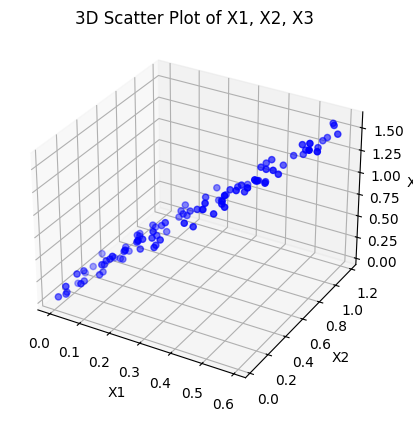

In [28]:
# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(training_data['X1'], training_data['X2'], training_data['X3'], color='b', marker='o')

# Labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Show plot
plt.title("3D Scatter Plot of X1, X2, X3")
plt.show()

### To apply PCA on this Dataframe, We have to calculate its Covariance matrix $\Sigma$ which is done by:


\[
\begin{aligned}
\Sigma &= \frac{1}{N_{\text{train}}} (\bar{X} \bar{X}^T) \\
N_{\text{train}} &= 100 \\
\bar{X} &= \text{mean-centered data}
\end{aligned}
\]


In [29]:
X_transpose = np.array(training_data)
X_bar_transpose = X_transpose - np.mean(X_transpose,axis=0)
X_bar = X_bar_transpose.T
N_train = training_data.shape[0]

In [30]:
sigma = (1/N_train) * np.matmul(X_bar,X_bar_transpose)

In [31]:
sigma

array([[ 2.84640485e-02,  4.50771396e-02,  6.91506476e-02,
         3.10127436e-01,  3.08997312e-01,  4.05752326e-01,
         1.44463940e-03,  1.47127838e-03,  2.05980305e-01,
         1.06007205e-02],
       [ 4.50771396e-02,  8.02498318e-02,  1.10426900e-01,
         4.94173214e-01,  4.93019848e-01,  6.47361431e-01,
        -2.50562121e-02,  1.13115256e-03,  2.96786176e-01,
         2.34691447e-02],
       [ 6.91506476e-02,  1.10426900e-01,  1.71436897e-01,
         7.67603072e-01,  7.64682165e-01,  1.00546796e+00,
         6.90285156e-04,  2.94784793e-03,  5.65283432e-01,
         2.59692504e-02],
       [ 3.10127436e-01,  4.94173214e-01,  7.67603072e-01,
         3.52902703e+00,  3.51700849e+00,  4.54535691e+00,
         3.70899991e-02,  1.15108337e-02,  2.43417846e+00,
         9.73912097e-02],
       [ 3.08997312e-01,  4.93019848e-01,  7.64682165e-01,
         3.51700849e+00,  3.51009881e+00,  4.53157425e+00,
         3.07545664e-02,  1.30786017e-02,  2.37327946e+00,
         9.

### Now we want to Project our $\bar{X}^T$ data of Shape $(N_{\text{train}} , p)$ where $p$ is the number of input variables in the Dataframe (i.e $p = 3$) into a vector space (having orthogonal basis vectors $\vec{q_1},\vec{q_2},\vec{q_3} .. \vec{q_p}$) that the cov matrix of the projected data will be the Matrix $D$

### Let $Q$ (of shape  $p \times p$) be the matrix that contains the all the orthogonal basis vectors so the projected data will be given by $Q \bar{X}$ and $D$ is defined by:

\[
\begin{aligned}
D = \frac{1}{N_{\text{train}}} (Q \bar{X}) (Q \bar{X})^T \\
\end{aligned}
\]

By reducing:
\[
\begin{aligned}
\Sigma = Q^T \Lambda  Q \\
\end{aligned}
\]
where $\lambda$ is $D$

In [32]:
factorized_sigma = np.linalg.svd(sigma) 


In [33]:
Q_transpose = factorized_sigma[0]
Q = Q_transpose.T
Z = np.matmul(Q,X_bar)


In [34]:
New_data = pd.DataFrame(data = Z.T,columns=["Z1","Z2","Z3","Z4","Z5","Z6","Z7","Z8","Z9","Z10"])
New_data

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10
0,13.024186,-1.129720,1.916659,0.216496,0.168073,0.119433,-0.105818,-0.010968,-0.038874,0.042245
1,-1.638586,-4.255014,0.371011,-1.069067,0.252891,0.069294,0.165641,-0.073647,-0.004562,-0.001296
2,9.113514,4.946232,-2.432390,-1.582017,-0.100721,-0.111981,-0.081205,0.089663,0.023781,0.027457
3,-6.759936,-0.920734,-0.304185,-0.864108,0.237541,-0.140308,0.085722,-0.063420,0.066193,0.025810
4,-0.101789,1.633524,1.894305,0.519595,-0.038506,-0.131952,-0.070911,-0.051967,-0.005695,0.004893
...,...,...,...,...,...,...,...,...,...,...
95,-2.460747,-3.576170,0.906703,1.469940,-0.125703,0.083166,-0.127833,0.005557,0.012778,0.036554
96,-16.028296,2.679520,1.666893,-0.088099,0.286425,-0.037287,0.059283,0.117511,-0.007540,-0.014072
97,11.642598,-0.224745,-0.150513,0.408066,0.429784,-0.097813,0.029491,0.049126,0.073917,-0.015789
98,14.805946,1.219564,0.185411,0.714330,-0.260319,0.156447,-0.025821,0.041037,0.027692,-0.018157


In [50]:
eigen_values = factorized_sigma[1]
total = np.sum(eigen_values)

var_sum = 0
pvp = 0.82

for i in range(eigen_values.shape[0]):
    if (var_sum/total) > pvp:
        break
    var_sum += eigen_values[i]
    val = i

projected_final = New_data.iloc[:,0:(val-1)]
projected_final


,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9
0,13.024186,-1.129720,1.916659,0.216496,0.168073,0.119433,-0.105818,-0.010968,-0.038874
1,-1.638586,-4.255014,0.371011,-1.069067,0.252891,0.069294,0.165641,-0.073647,-0.004562
2,9.113514,4.946232,-2.432390,-1.582017,-0.100721,-0.111981,-0.081205,0.089663,0.023781
3,-6.759936,-0.920734,-0.304185,-0.864108,0.237541,-0.140308,0.085722,-0.063420,0.066193
4,-0.101789,1.633524,1.894305,0.519595,-0.038506,-0.131952,-0.070911,-0.051967,-0.005695
...,...,...,...,...,...,...,...,...,...
95,-2.460747,-3.576170,0.906703,1.469940,-0.125703,0.083166,-0.127833,0.005557,0.012778
96,-16.028296,2.679520,1.666893,-0.088099,0.286425,-0.037287,0.059283,0.117511,-0.007540
97,11.642598,-0.224745,-0.150513,0.408066,0.429784,-0.097813,0.029491,0.049126,0.073917
98,14.805946,1.219564,0.185411,0.714330,-0.260319,0.156447,-0.025821,0.041037,0.027692


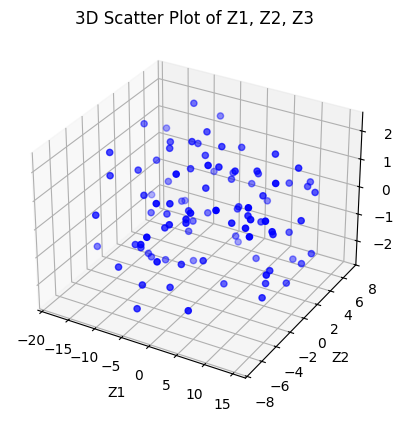

In [52]:
# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(projected_final['Z1'], projected_final['Z2'], projected_final['Z3'], color='b', marker='o')

# Labels
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')

# Show plot
plt.title("3D Scatter Plot of Z1, Z2, Z3")
plt.show()